In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

ticker = 'FB'
start = dt.datetime(2018,1,1)
end = dt.datetime.now()

data = web.DataReader(ticker,'yahoo',start,end)

print(data)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-02  181.580002  177.550003  177.679993  181.419998  18151900   
2018-01-03  184.779999  181.330002  181.880005  184.669998  16886600   
2018-01-04  186.210007  184.100006  184.899994  184.330002  13880900   
2018-01-05  186.899994  184.929993  185.589996  186.850006  13574500   
2018-01-08  188.899994  186.330002  187.199997  188.279999  17994700   
...                ...         ...         ...         ...       ...   
2021-05-17  315.679993  311.579987  313.549988  315.459991  15401300   
2021-05-18  316.500000  309.809998  315.589996  309.959991  14522400   
2021-05-19  314.660004  303.570007  304.190002  313.589996  19106200   
2021-05-20  319.250000  313.160004  313.579987  318.609985  17303200   
2021-05-21  319.929993  316.200012  319.290009  317.609985   6917739   

             Adj Close  
Date                    
2018-01-02  1

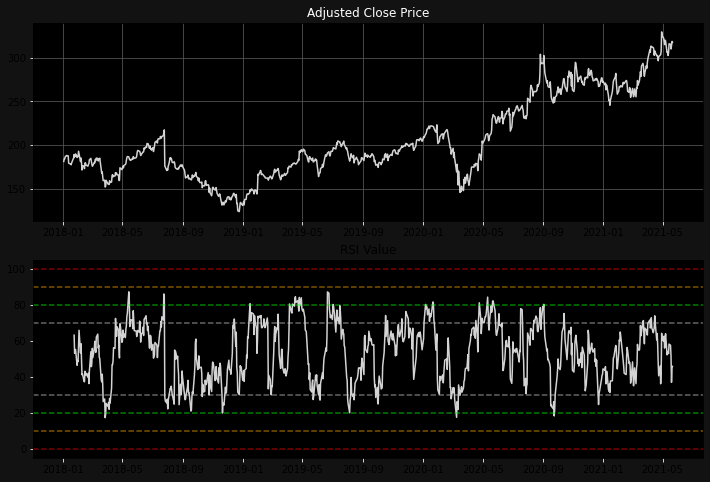

In [2]:
delta = data['Adj Close'].diff(1)
delta.dropna(inplace = True)
positive = delta.copy()
negative = delta.copy()
positive[positive<0]=0 #all positive remains the same
negative[negative>0]=0 #all negative remains the same
days = 14 #you can set it
#RSI requires the average gain and average loss
average_gain = positive.rolling(window=days).mean()#on a specific time frame #mean of last 14 days
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0+relative_strength))

#combined dataframe #we start from a new empty frame
combined = pd.DataFrame()
combined['Adj Close'] = data['Adj Close']
combined['RSI'] = RSI #it works because all we deal with at the top is DF as well

#First plot, the stock price

plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index,combined['Adj Close'],color='lightgray')
ax1.set_title('Adjusted Close Price',color='white')

ax1.grid(True, color='#555555') #dark and grey
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')#almost black
ax1.tick_params(axis='x',color='white')
ax1.tick_params(axis='y',color='white')

#Second plot, the RSI

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color = 'lightgray')
ax2.axhline(0,linestyle='--',alpha=0.5,color='#ff0000') #DeepRed for extreme value
ax2.axhline(10,linestyle='--',alpha=0.5,color='#ffaa00') #yellow
ax2.axhline(20,linestyle='--',alpha=0.5,color='#00ff00')
ax2.axhline(30,linestyle='--',alpha=0.5,color='#cccccc')
ax2.axhline(70,linestyle='--',alpha=0.5,color='#cccccc')
ax2.axhline(80,linestyle='--',alpha=0.5,color='#00ff00')
ax2.axhline(90,linestyle='--',alpha=0.5,color='#ffaa00')
ax2.axhline(100,linestyle='--',alpha=0.5,color='#ff0000') 

ax2.grid(False) #dark and grey
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.figure.set_facecolor('#121212')#almost black
ax2.tick_params(axis='x',color='white')
ax2.tick_params(axis='y',color='white')
ax2.set_title('RSI Value')

plt.show()

https://www.investopedia.com/terms/r/rsi.asp